# Set-up

In [1]:
# Basic imports
import pandas as pd
from tqdm.notebook import trange, tqdm
import os
from os.path import join
from datetime import datetime
import holidays

# Plotting imports
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set_theme()

# utils import
from utils import weekday_mapping, get_string_color

# Load data

In [19]:
rerun_processing = True

In [9]:
if rerun_processing:
    folder  = "/Users/guillaume/Library/CloudStorage/OneDrive-PolitecnicodiMilano/Share/Elena - Guillaume/Fabbisogno al quarto d'ora - Terna"

    df_list = []
    for file in os.listdir(folder):
        df = pd.read_excel(join(folder, file))
        df_list.append(df)
    source_df = pd.concat(df_list, ignore_index=True)
    source_df.sort_values(by=['REGIONE', 'DATA_QUARTO'], inplace=True)
    source_df

In [18]:
if rerun_processing:
    df = source_df.copy()
    df['REGIONE'] = df['REGIONE'].str.title()
    df['Date'] = df['DATA_QUARTO'].dt.floor('H')
    df['FABBISOGNO100'] = df['FABBISOGNO100'].round(0)
    df = df.groupby(['Date', 'REGIONE'], as_index=False)['FABBISOGNO100'].sum()
    df = df.pivot(columns='REGIONE', values='FABBISOGNO100', index='Date')
    df.head()
    df.to_csv('data/1_input/load/regional/load.csv')
else:
    df = pd.read_csv('data/1_input/load/regional/load.csv', index_col=0)
    df.index = pd.to_datetime(df.index)
df.head()

,Abruzzo,Basilicata,Calabria,Campania,Emilia Romagna,Friuli,Lazio,Liguria,Lombardia,Marche,Molise,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Trentino Alto Adige,Umbria,Valle D'Aosta,Veneto
Date,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,520.0,280.0,672.0,1776.0,1936.0,592.0,2084.0,609.0,4310.0,516.0,139.0,1810.0,1704.0,854.0,1898.0,1692.0,492.0,394.0,99.0,1957.0
2018-01-01 01:00:00,507.0,249.0,619.0,1712.0,1848.0,574.0,1974.0,579.0,4079.0,491.0,124.0,1753.0,1621.0,821.0,1815.0,1605.0,470.0,373.0,90.0,1885.0
2018-01-01 02:00:00,470.0,227.0,567.0,1535.0,1719.0,542.0,1870.0,531.0,3892.0,466.0,118.0,1607.0,1508.0,812.0,1706.0,1536.0,437.0,354.0,79.0,1764.0
2018-01-01 03:00:00,441.0,224.0,534.0,1381.0,1609.0,512.0,1757.0,486.0,3798.0,438.0,118.0,1505.0,1476.0,783.0,1584.0,1486.0,410.0,328.0,72.0,1687.0
2018-01-01 04:00:00,438.0,220.0,516.0,1295.0,1589.0,499.0,1682.0,480.0,3775.0,423.0,106.0,1487.0,1418.0,765.0,1480.0,1459.0,371.0,315.0,70.0,1648.0


In [20]:
if rerun_processing:
    df['year'] = df.index.year
    df['month_day'] = df.index.to_series().apply(lambda d: d.replace(year=2020))
    df['day'] = df.index.date
    df['time'] = df.index.to_series().apply(lambda d: d.replace(year=2020, month=1, day=1))
    df['weekday'] = df.index.weekday.map(weekday_mapping)
    df['hour'] = df.index.hour
    df['monthofyear'] = df.index.month
    df['weekofyear'] = df.index.isocalendar().week
    df['daytype'] = 'Working day'
    df.loc[df.weekday == 'Saturday', 'daytype'] = 'Saturday'
    df.loc[df.weekday == 'Sunday', 'daytype'] = 'Holiday'
    df.loc[df.day.apply(lambda day: day in holidays.IT(years=df.year.unique())), 'daytype'] = 'Holiday'
    df.head()
    df.to_csv('data/1_input/load/regional/load_with_calendar.csv')
else:
    df = pd.read_csv('data/1_input/load/regional/load_with_calendar.csv', index_col=0)
    df.index = pd.to_datetime(df.index)
df.head()

,Abruzzo,Basilicata,Calabria,Campania,Emilia Romagna,Friuli,Lazio,Liguria,Lombardia,Marche,...,Veneto,year,month_day,day,time,weekday,hour,monthofyear,weekofyear,daytype
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,520.0,280.0,672.0,1776.0,1936.0,592.0,2084.0,609.0,4310.0,516.0,...,1957.0,2018,2020-01-01 00:00:00,2018-01-01,2020-01-01 00:00:00,Monday,0,1,1,Holiday
2018-01-01 01:00:00,507.0,249.0,619.0,1712.0,1848.0,574.0,1974.0,579.0,4079.0,491.0,...,1885.0,2018,2020-01-01 01:00:00,2018-01-01,2020-01-01 01:00:00,Monday,1,1,1,Holiday
2018-01-01 02:00:00,470.0,227.0,567.0,1535.0,1719.0,542.0,1870.0,531.0,3892.0,466.0,...,1764.0,2018,2020-01-01 02:00:00,2018-01-01,2020-01-01 02:00:00,Monday,2,1,1,Holiday
2018-01-01 03:00:00,441.0,224.0,534.0,1381.0,1609.0,512.0,1757.0,486.0,3798.0,438.0,...,1687.0,2018,2020-01-01 03:00:00,2018-01-01,2020-01-01 03:00:00,Monday,3,1,1,Holiday
2018-01-01 04:00:00,438.0,220.0,516.0,1295.0,1589.0,499.0,1682.0,480.0,3775.0,423.0,...,1648.0,2018,2020-01-01 04:00:00,2018-01-01,2020-01-01 04:00:00,Monday,4,1,1,Holiday


# Exploration

In [21]:
# 20 regions
regions = [
    'Abruzzo',
    'Basilicata',
    'Calabria',
    'Campania',
    'Emilia Romagna',
    'Friuli',
    'Lazio',
    'Liguria',
    'Lombardia',
    'Marche',
    'Molise',
    'Piemonte',
    'Puglia',
    'Sardegna',
    'Sicilia',
    'Toscana',
    'Trentino Alto Adige',
    'Umbria',
    "Valle D'Aosta",
    'Veneto'
]

In [23]:
# Create subplots with two rows and one column
nrows, ncols = 4, 5
fig = sp.make_subplots(rows=4, cols=5, shared_xaxes=True, subplot_titles=regions)

#select_condition = (df.monthofyear == 8)
select_condition = pd.Series(len(df) * [True], index=df.index)

# For each region
for i, col in enumerate(regions):
    # For each type of day (Working day, Saturday, Sunday, Holiday)
    for j, daytype in enumerate(df.daytype.unique()):
        # We set the list of days to plot, subsampling for visibility
        days_to_plot = df[select_condition & (df.daytype == daytype)].day.drop_duplicates().sample(frac=0.05)
        # For each day to plot
        for k, day in enumerate(days_to_plot):
            day_df = df[df.day == day]
            # Plotting the line for each single day
            fig.add_trace(
                go.Scatter(
                    y = day_df[col],
                    x = day_df['hour'],
                    mode = "lines",
                    line = dict(color=get_string_color(sns.color_palette('deep')[j], opacity=0.1)),
                    showlegend = False
                ),
                row = 1+i//ncols,
                col = 1+i%ncols
            )
        # Getting the mean curve
        mean_df = df[select_condition & (df.daytype == daytype)].groupby('hour', as_index=False)[col].mean()
        # Plotting the mean
        fig.add_trace(
            go.Scatter(
                y = mean_df[col],
                x = mean_df['hour'],
                mode = "lines",
                line = dict(color=get_string_color(sns.color_palette('deep')[j])),
                name = daytype,
                showlegend = (i == 0) # We plot the legend for the first one only
            ),
            row=1+i//ncols,
            col=1+i%ncols
        )


# Update layout to adjust spacing
fig.update_layout(height=1000, width=1500)
fig.update_xaxes(range=[0, 24])
fig.show()

<HR>

# TESTS

<Axes: xlabel='DATA_QUARTO'>

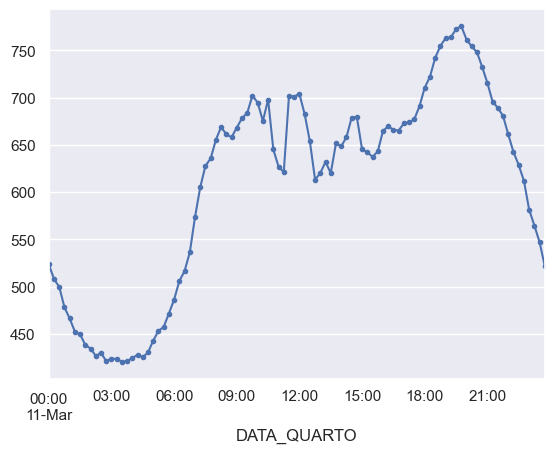

In [8]:
test_df.set_index('DATA_QUARTO')['FABBISOGNO100'].plot(marker='o', markersize=3)